In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
from npc_sessions import DynamicRoutingSession

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [2]:
# sessions with surface channels:
surf_chan_sessions=[
    '660023_2023-08-08',
    '660023_2023-08-09',
    '662892_2023-08-23',
    '662892_2023-08-24',
    '668755_2023-08-28',
    '668755_2023-08-29',
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_690706_20231129",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_690706_20231130",
]

In [ ]:
savepath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-12-05_verify_surface_channels\not_CAR'

In [ ]:
# for x in session._raw_surface_ap.fields['electrical_series'].keys():
#     x

In [ ]:
for ss in surf_chan_sessions[:]:

    session = DynamicRoutingSession(ss)

    probes_in_rec=list(session._raw_surface_ap.fields['electrical_series'].keys())

    for probe in probes_in_rec:
        #load both surface and deep channels
        surface = session._raw_surface_ap[probe]
        deep = session._raw_ap[probe]

        #plot ~1 sec of activity for both, side by side

        time_window=0.5
        sample_rate=30000
        n_samples=int(time_window*sample_rate)

        offset_corrected_deep=deep.data[-n_samples:,:]-np.median(deep.data[-n_samples:,:],axis=0)
        offset_corrected_surface=surface.data[-n_samples:,:]-np.median(surface.data[-n_samples:,:],axis=0)

        # car_deep_ch=(offset_corrected_deep.T-np.median(offset_corrected_deep,axis=1)).T
        # car_surface_ch=(offset_corrected_surface.T-np.median(offset_corrected_surface,axis=1)).T

        car_deep_ch=offset_corrected_deep
        car_surface_ch=offset_corrected_surface

        range=np.nanstd(car_deep_ch.flatten())*3

        # car_deep_ch=(deep.data[-n_samples:,:].T-np.mean(deep.data[-n_samples:,:],axis=1)).T
        # car_surface_ch=(surface.data[-n_samples:,:].T-np.mean(surface.data[-n_samples:,:],axis=1)).T

        fig,ax=plt.subplots(1,2,figsize=(15,8))

        ax[0].imshow(car_deep_ch.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-range,vmax=range)
        ax[0].invert_yaxis()
        ax[0].set_title('deep channels (last 0.5 sec of recording)')
        ax[0].set_ylabel('channel number')
        ax[0].set_xlabel('samples')

        ax[1].imshow(car_surface_ch.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-range,vmax=range)
        ax[1].invert_yaxis()
        ax[1].set_title('surface channels (first 0.5 sec of recording)')
        ax[1].set_xlabel('samples')

        fig.suptitle(session.session_id+' '+probe+' (no CAR)')

        fig.savefig(os.path.join(savepath,session.session_id+'_'+probe+'_surface_channels_not_CAR.png'),
                    dpi=300, facecolor='w', edgecolor='w', format='png',
                    transparent=True, bbox_inches='tight', pad_inches=0.1,
                    metadata=None)
        

In [3]:
session=DynamicRoutingSession(surf_chan_sessions[1])
# session=DynamicRoutingSession('668755_2023-08-31')

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\hdmf\common\table.py:1427: UserWarning: The linked table for DynamicTableRegion 'electrodes' does not share an ancestor with the DynamicTableRegion.
  warn(msg)


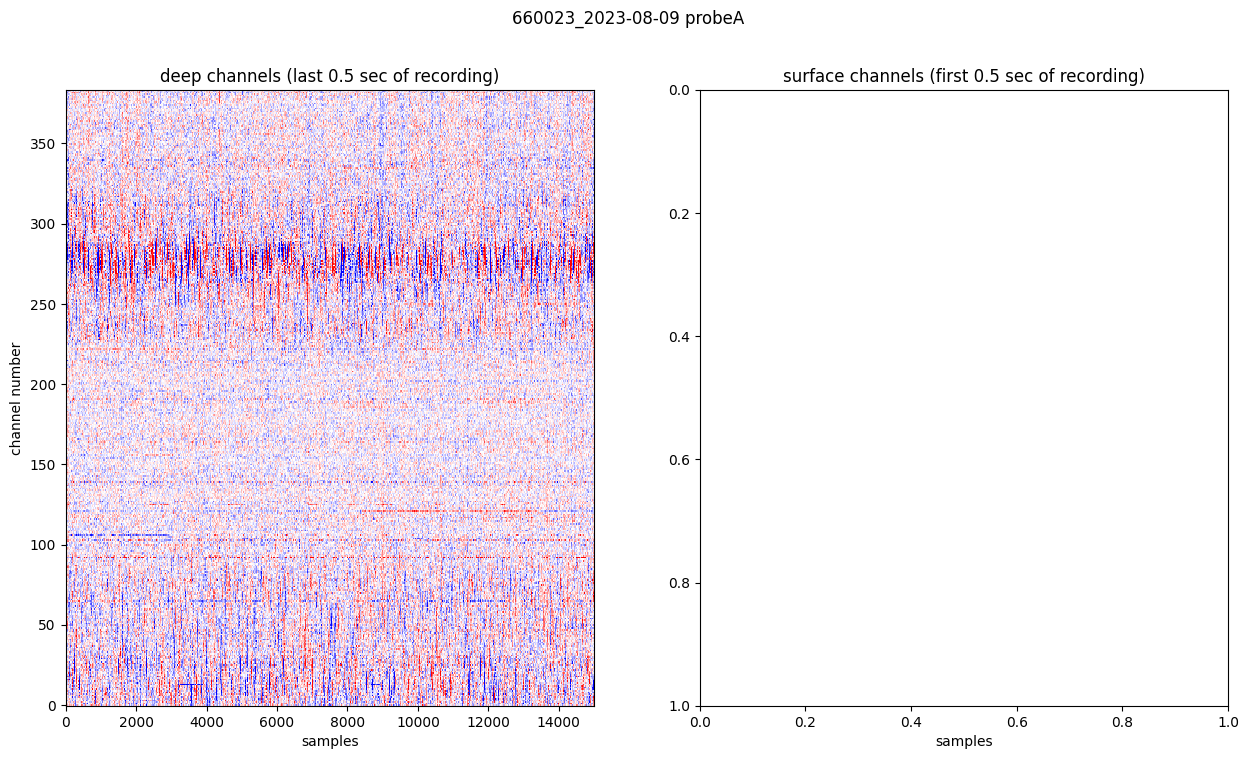

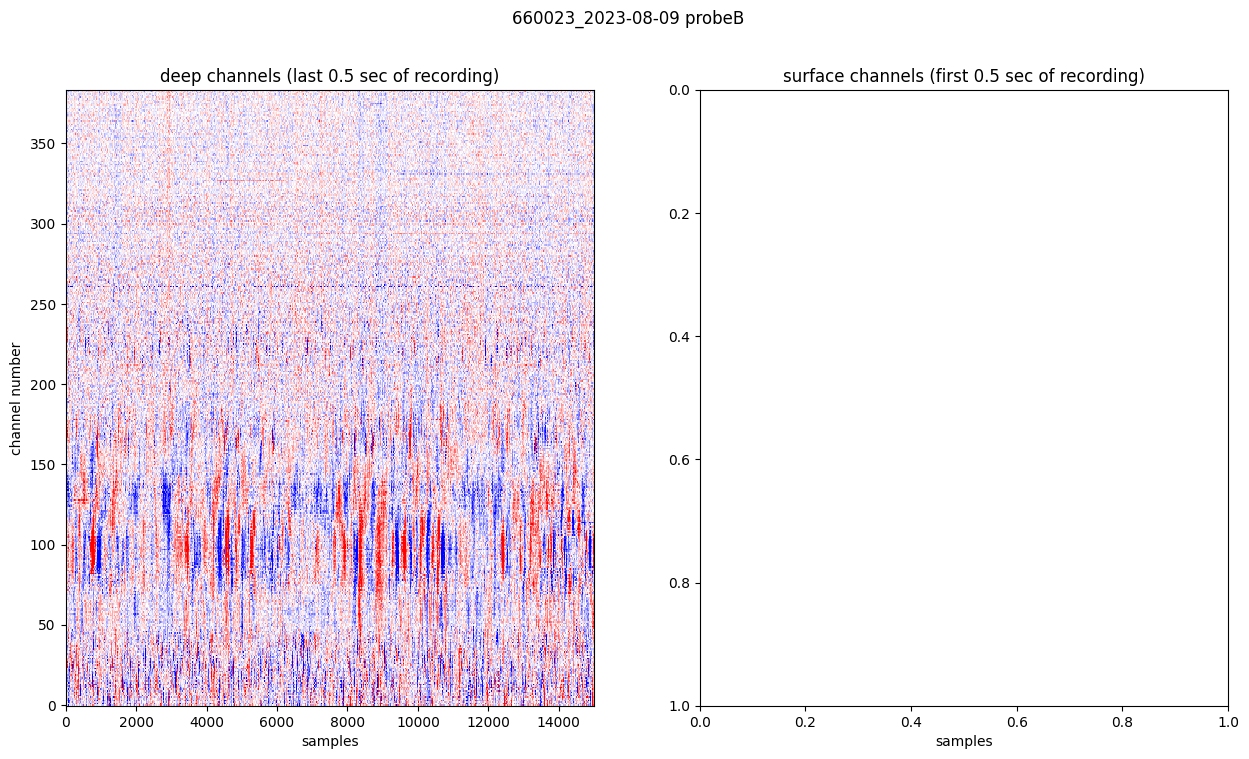

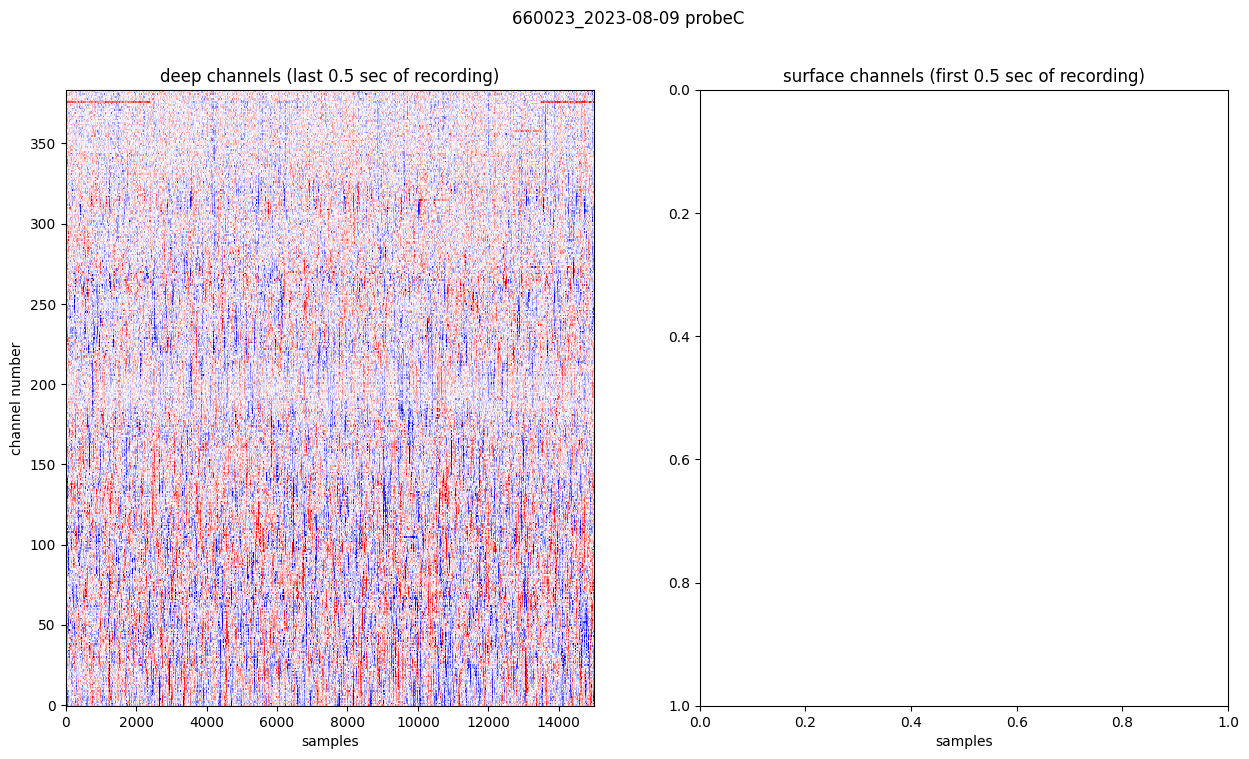

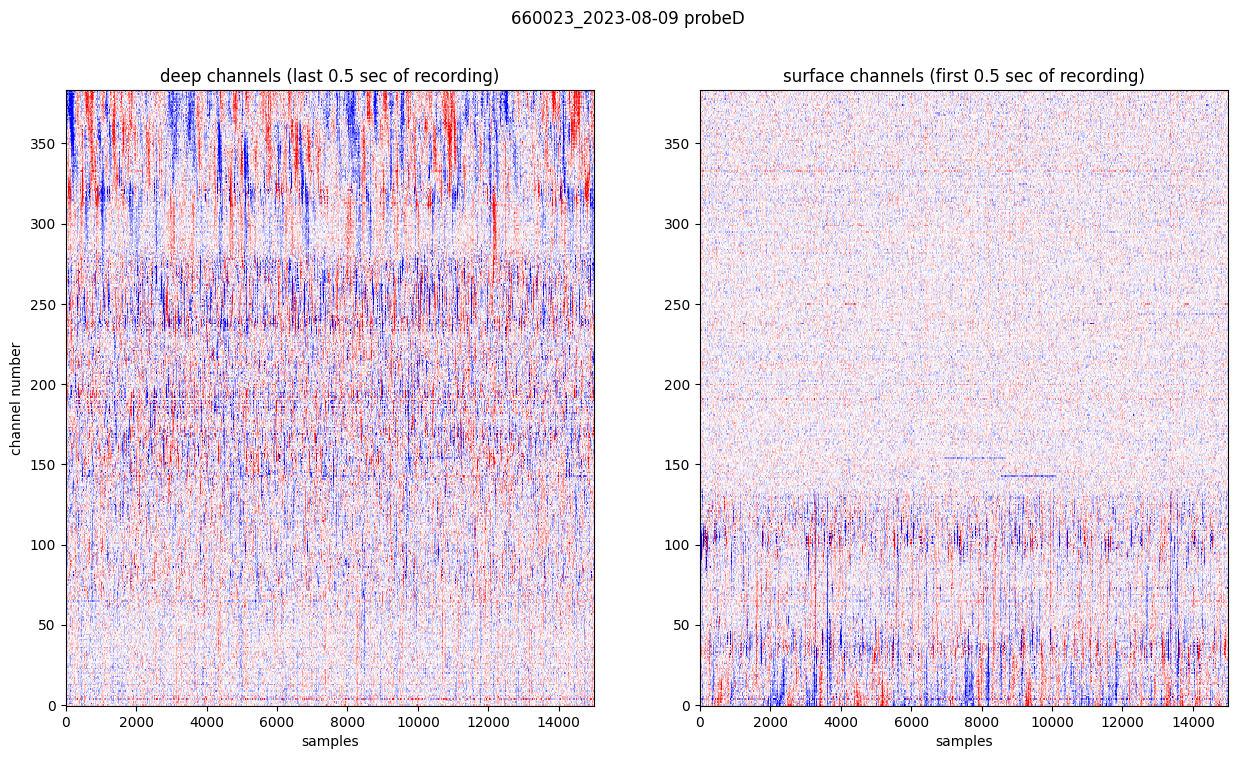

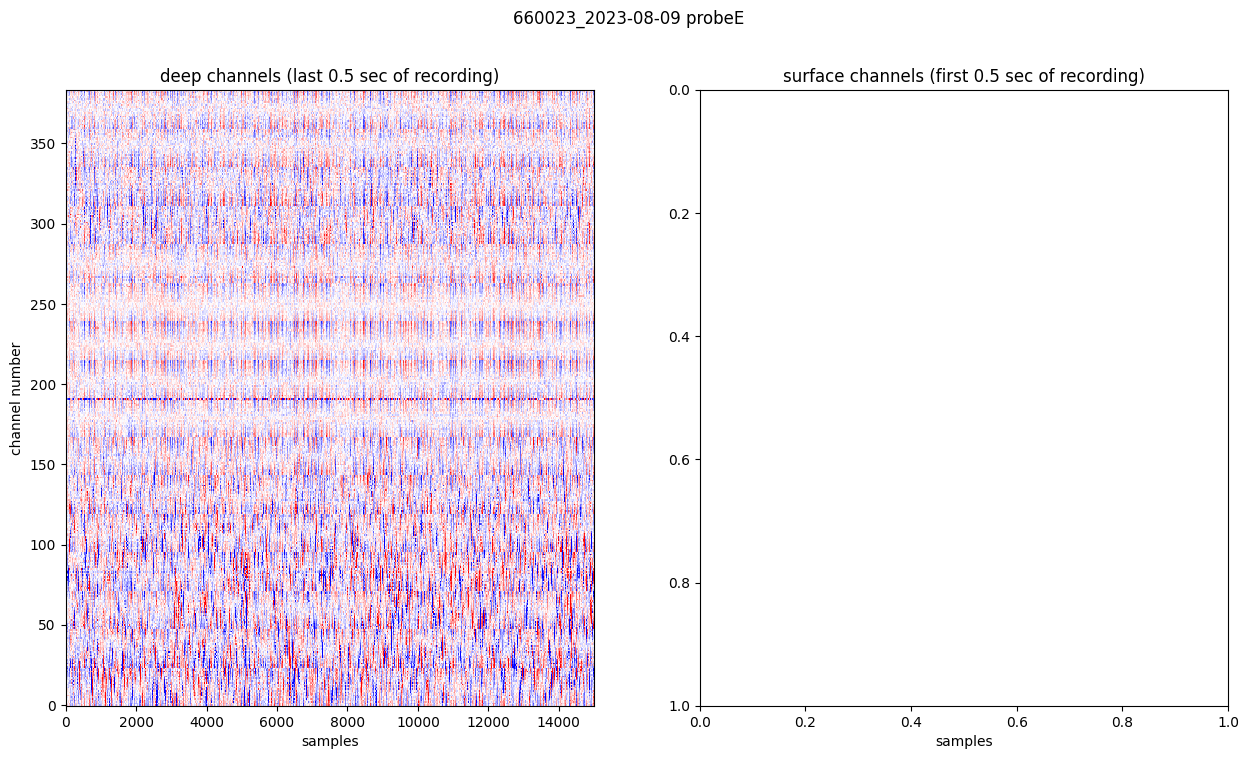

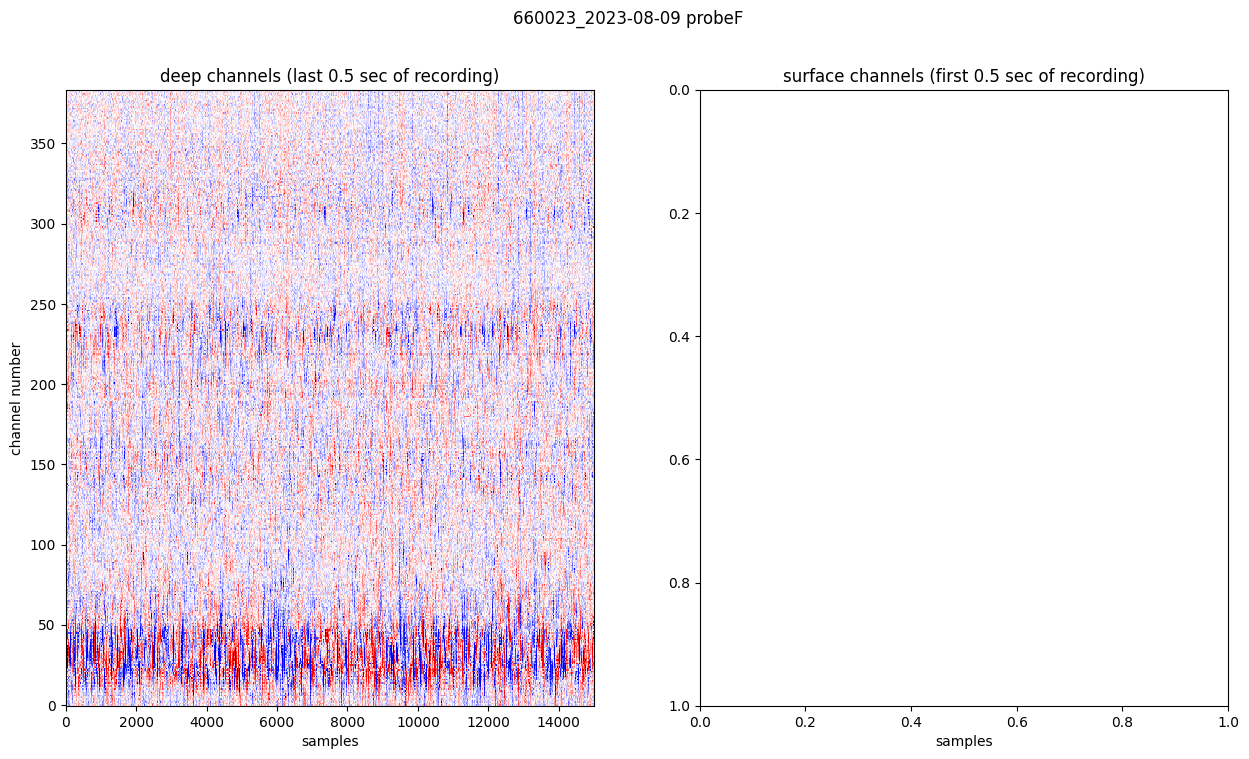

In [4]:
figs=session.plot_raw_ap_vs_surface()

In [ ]:
session.session_id

In [ ]:
probes_in_rec=list(session._raw_ap.fields['electrical_series'].keys())

In [ ]:
probe=probes_in_rec[0]

#load both surface and deep channels
# surface = session._raw_surface_ap[probe]
deep = session._raw_ap[probe]

In [ ]:
probe in session._raw_surface_ap.fields['electrical_series']

In [ ]:
len(session._raw_surface_ap.fields['electrical_series'])

In [ ]:
deep.rate

In [ ]:
session._raw_surface_ap['probeA'].data.shape

In [ ]:
#plot ~1 sec of activity for both, side by side

time_window=0.5
sample_rate=30000
n_samples=int(time_window*sample_rate)

car_deep_ch=(deep.data[-n_samples:,:].T-np.mean(deep.data[-n_samples:,:],axis=1)).T
car_surface_ch=(surface.data[-n_samples:,:].T-np.mean(surface.data[-n_samples:,:],axis=1)).T

fig,ax=plt.subplots(1,2,figsize=(15,8))
for ch in range(0,384,10):
    ax[0].plot(np.arange(0,n_samples),car_deep_ch[:,ch]+ch*10)
    ax[1].plot(np.arange(0,n_samples),car_surface_ch[:,ch]+ch*10)
# ax[0].plot(np.arange(0,30000),surface.data[:30000,:])

In [ ]:
#plot ~1 sec of activity for both, side by side

time_window=0.5
sample_rate=30000
n_samples=int(time_window*sample_rate)

offset_corrected_deep=deep.data[-n_samples:,:]-np.median(deep.data[-n_samples:,:],axis=0)
offset_corrected_surface=surface.data[-n_samples:,:]-np.median(surface.data[-n_samples:,:],axis=0)

car_deep_ch=(offset_corrected_deep.T-np.median(offset_corrected_deep,axis=1)).T
car_surface_ch=(offset_corrected_surface.T-np.median(offset_corrected_surface,axis=1)).T

# car_deep_ch=(deep.data[-n_samples:,:].T-np.mean(deep.data[-n_samples:,:],axis=1)).T
# car_surface_ch=(surface.data[-n_samples:,:].T-np.mean(surface.data[-n_samples:,:],axis=1)).T

fig,ax=plt.subplots(1,2,figsize=(15,8))

ax[0].imshow(car_deep_ch.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-25,vmax=25)
ax[0].invert_yaxis()
ax[0].set_title('deep channels')

ax[1].imshow(car_surface_ch.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-25,vmax=25)
ax[1].invert_yaxis()
ax[1].set_title('surface channels')

fig.suptitle(session.session_id+' '+probe)
# ax[0].plot(np.arange(0,30000),surface.data[:30000,:])

In [ ]:
fig,ax=plt.subplots()
ax.hist(car_deep_ch.flatten(),bins=100)


In [ ]:
fig,ax=plt.subplots()
ax.hist(car_deep_ch.flatten(),bins=100)


In [ ]:
np.nanstd(car_deep_ch.flatten())
25/7

In [ ]:
#load raw ephys directly

paths={
    '668755_2023-08-28':{
        'surface':{
            'A':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230828_surface_channels\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\continuous.dat",
        },
        'deep':{
            'A':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230828\DRpilot_668755_20230828\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\continuous.dat"
        }
    },

    '668755_2023-08-29':{
        'surface':{
            'A':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\continuous.dat",
            'B':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat",
            'C':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC-AP\continuous.dat",
            'D':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD-AP\continuous.dat",
            'E':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP\continuous.dat",
            'F':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829_surface_channels\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP\continuous.dat",
        },
        'deep':{
            'A':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\continuous.dat",
            'B':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat",
            'C':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 102\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC-AP\continuous.dat",
            'D':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD-AP\continuous.dat",
            'E':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP\continuous.dat",
            'F':r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_668755_20230829\DRpilot_668755_20230829\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP\continuous.dat",
        }
    },
}



In [ ]:
savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-12-05_verify_surface_channels\from_raw_data"

In [ ]:
locations=['deep','surface']

for session in paths:
    for probe in paths[session][locations[0]]:
        fig,ax=plt.subplots(1,2,figsize=(15,8))
        for ch,channels in enumerate(locations):
            raw_data=np.memmap(paths[session][channels][probe],dtype=np.int16,mode='r')
            raw_data=np.reshape(raw_data, (int(raw_data.size / 384), 384))

            time_window=0.5
            sample_rate=30000
            n_samples=int(time_window*sample_rate)

            offset_corrected=raw_data[-n_samples:,:]-np.median(raw_data[-n_samples:,:],axis=0)

            car=(offset_corrected.T-np.median(offset_corrected,axis=1)).T

            if channels=='deep':
                range=np.nanstd(car.flatten())*3
                ax[ch].set_title('deep channels (last 0.5 sec of recording)')
                ax[ch].set_ylabel('channel number')
                
            elif channels=='surface':
                ax[ch].set_title('surface channels (first 0.5 sec of recording)')

            ax[ch].imshow(car.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-range,vmax=range)
            ax[ch].set_xlabel('samples')
            ax[ch].invert_yaxis()

        fig.suptitle(session+' '+probe+' (CAR)')

        fig.savefig(os.path.join(savepath,session+'_'+probe+'_surface_channels_CAR_from_raw_data.png'),
                    dpi=300, facecolor='w', edgecolor='w', format='png',
                    transparent=True, bbox_inches='tight', pad_inches=0.1,
                    metadata=None)

In [ ]:
raw_data.shape

In [ ]:
time_window=0.5

for probe in list(session._raw_ap.fields['electrical_series'].keys()):
    
    n_samples=int(time_window*session._raw_ap[probe].rate)
    offset_corrected=session._raw_ap[probe].data[-n_samples:,:]-np.median(session._raw_ap[probe].data[-n_samples:,:],axis=0)
    car=(offset_corrected.T-np.median(offset_corrected,axis=1)).T

    if probe in session._raw_surface_ap.fields['electrical_series']:
        n_samples=int(time_window*session._raw_surface_ap[probe].rate)
        offset_corrected_surface=session._raw_surface_ap[probe].data[-n_samples:,:]-np.median(session._raw_surface_ap[probe].data[-n_samples:,:],axis=0)
        car_surface=(offset_corrected_surface.T-np.median(offset_corrected_surface,axis=1)).T
        surface_channel_recording=True
    else:
        surface_channel_recording=False

    range=np.nanstd(car.flatten())*3

    fig, ax = plt.subplots(1,2,figsize=(15,8))

    ax[0].imshow(car.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-range,vmax=range)
    ax[0].invert_yaxis()
    ax[0].set_title('deep channels (last '+str(time_window)+' sec of recording)')
    ax[0].set_ylabel('channel number')
    ax[0].set_xlabel('samples')

    if surface_channel_recording:
        ax[1].imshow(car_surface.T,aspect='auto',interpolation='none',cmap='bwr',vmin=-range,vmax=range)

    ax[1].invert_yaxis()
    ax[1].set_title('surface channels (first '+str(time_window)+' sec of recording)')
    ax[1].set_xlabel('samples')

    fig.suptitle(session.session_id+' '+probe)